<a href="https://colab.research.google.com/github/rsakm/HealthSense-AI-Multiple-Diseases-Prediction-ML/blob/master/Notebooks/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== DATA SUMMARY ===
Shape: (303, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Class Distribution:
target
1    165
0    138
Name: count, dtype: int64

Statistical Summary:
        

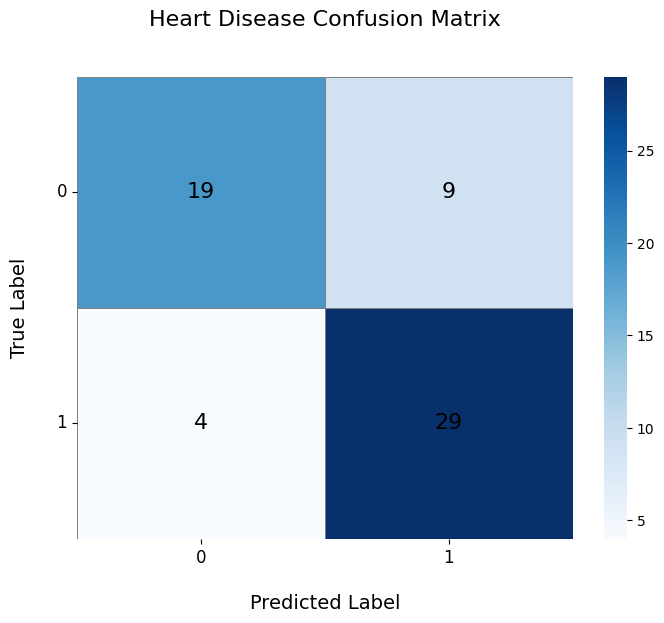

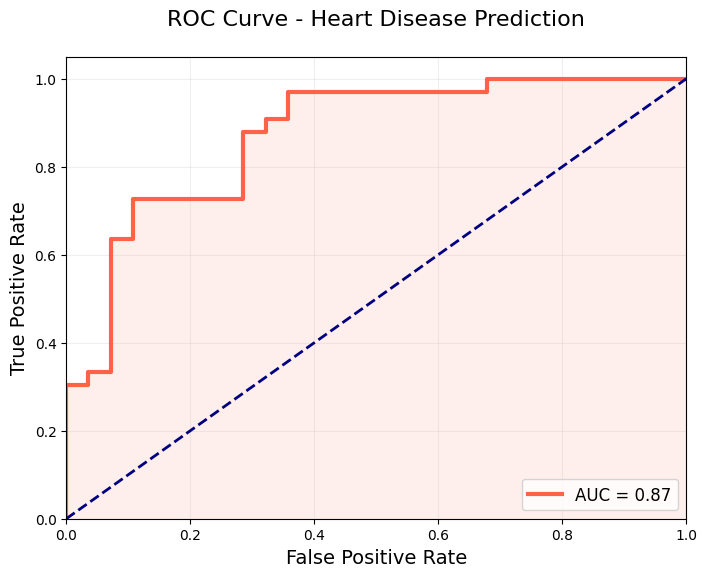

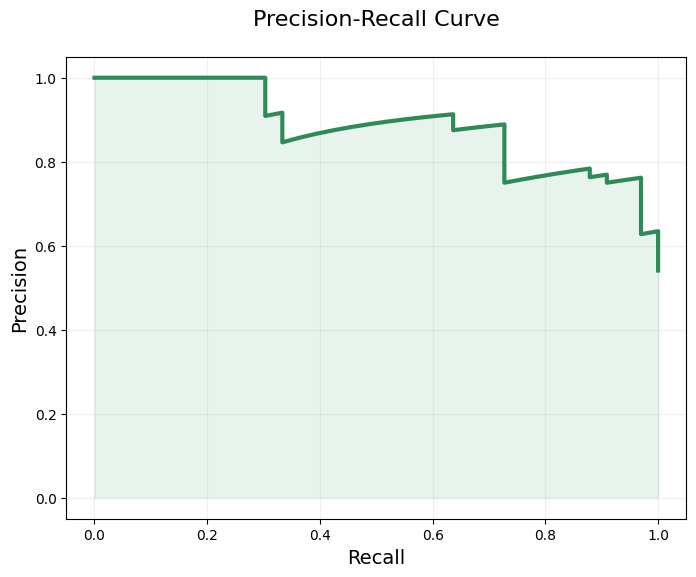

<ipython-input-1-f3e7261df0e3>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeffs, palette='vlag')


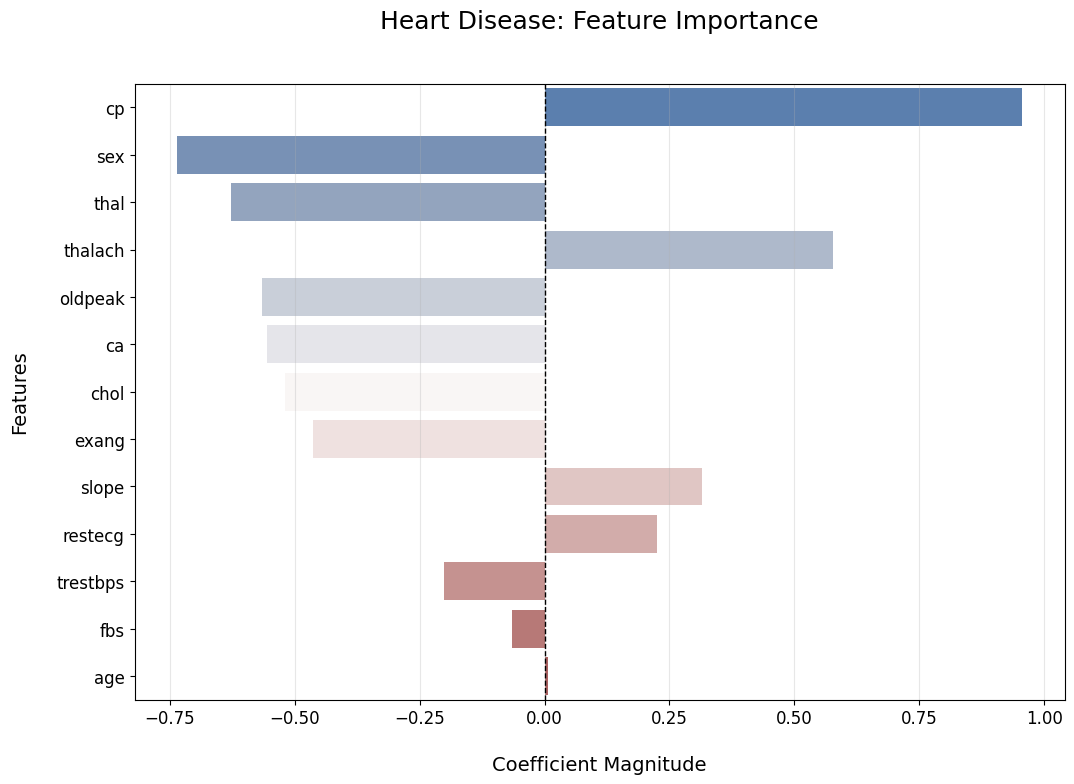

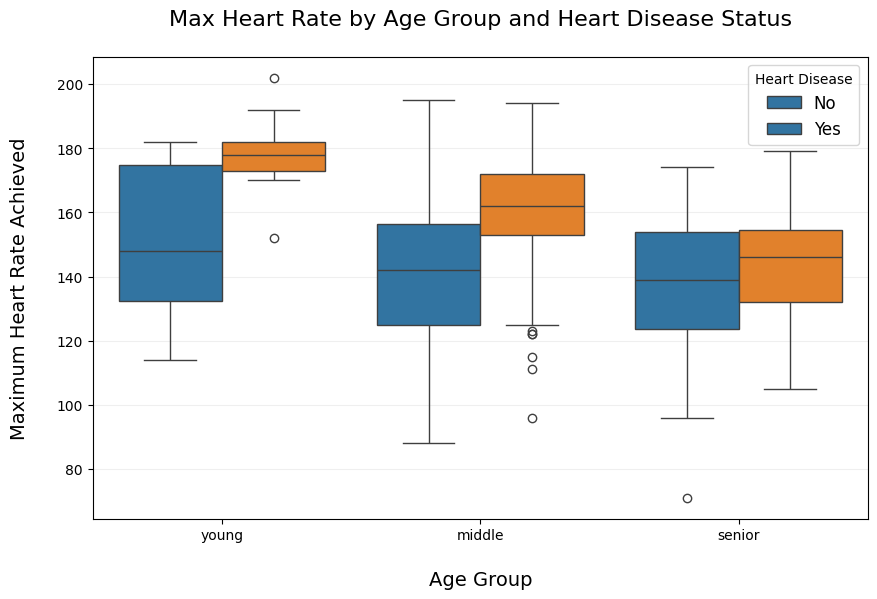


=== TOP 5 RISK FACTORS ===
Feature  Coefficient
     cp     0.956337
    sex    -0.736230
   thal    -0.627306
thalach     0.577218
oldpeak    -0.565566

Model and scaler saved successfully!

=== SAMPLE PREDICTION ===
Prediction: Heart Disease
Probability: 84.93%
Confidence: High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
#HEART DISEASE PREDICTION SYSTEM

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_curve, auc, precision_recall_curve)
import pickle
from google.colab import files  # For downloading files in Colab

# Load data
heart = pd.read_csv('heart.csv')
print("\033[1m" + "=== DATA SUMMARY ===" + "\033[0m")
print(f"Shape: {heart.shape}")
print("\nFirst 5 rows:")
print(heart.head())
print("\nMissing Values:")
print(heart.isna().sum())
print("\nClass Distribution:")
print(heart['target'].value_counts())
print("\nStatistical Summary:")
print(heart.describe())

# Preprocessing
X = heart.drop('target', axis=1)
y = heart['target']

# Feature Engineering (example)
heart['age_group'] = pd.cut(heart['age'],
                           bins=[20,40,60,80],
                           labels=['young','middle','senior'])

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Model training with class balancing
model = LogisticRegression(max_iter=1000,
                          class_weight='balanced',
                          solver='liblinear',
                          random_state=42)
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"\n\033[1mCross-Validation Accuracy: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})\033[0m")

# Evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n\033[1m=== CLASSIFICATION REPORT ===\033[0m")
print(classification_report(y_test, y_pred))

# ======================
#Visualizations
# ======================

# 1. Confusion Matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           annot_kws={"size": 16, "color": 'black'},
           linewidths=0.5, linecolor='gray')
plt.title('Heart Disease Confusion Matrix\n', fontsize=16, pad=20)
plt.xlabel('\nPredicted Label', fontsize=14)
plt.ylabel('True Label\n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.savefig('heart_confusion_matrix.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
# files.download('heart_confusion_matrix.png')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='#FF6347', lw=3, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr, tpr, alpha=0.1, color='#FF6347')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Heart Disease Prediction\n', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.2)
plt.savefig('heart_roc_curve.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
# files.download('heart_roc_curve.png')

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='#2E8B57', lw=3)
plt.fill_between(recall, precision, alpha=0.1, color='#2E8B57')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve\n', fontsize=16)
plt.grid(True, alpha=0.2)
plt.savefig('heart_precision_recall.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
# files.download('heart_precision_recall.png')

# 4. Feature Importance
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coeffs, palette='vlag')
plt.title('Heart Disease: Feature Importance\n', fontsize=18, pad=20)
plt.axvline(0, color='k', linestyle='--', lw=1)
plt.xlabel('\nCoefficient Magnitude', fontsize=14)
plt.ylabel('Features\n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.savefig('heart_feature_importance.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
# files.download('heart_feature_importance.png')

# 5. Age Distribution Analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='thalach', hue='target', data=heart,
           palette={0: '#1f77b4', 1: '#ff7f0e'})
plt.title('Max Heart Rate by Age Group and Heart Disease Status\n', fontsize=16)
plt.xlabel('\nAge Group', fontsize=14)
plt.ylabel('Maximum Heart Rate Achieved\n', fontsize=14)
plt.legend(title='Heart Disease', labels=['No', 'Yes'], fontsize=12)
plt.grid(axis='y', alpha=0.2)
plt.savefig('heart_age_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
# files.download('heart_age_analysis.png')

# Top 5 Risk Factors
print("\n\033[1m=== TOP 5 RISK FACTORS ===\033[0m")
print(coeffs.head(5).to_string(index=False))

# Save artifacts
pickle.dump(model, open('heart_model.sav', 'wb'))
pickle.dump(scaler, open('heart_scaler.sav', 'wb'))
print("\n\033[1mModel and scaler saved successfully!\033[0m")

# Prediction Example
sample_input = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)
probability = model.predict_proba(sample_scaled)[0][1]

print("\n\033[1m=== SAMPLE PREDICTION ===\033[0m")
print(f"Prediction: {'Heart Disease' if prediction[0] == 1 else 'Healthy'}")
print(f"Probability: {probability:.2%}")
print(f"Confidence: {'High' if probability > 0.7 else 'Medium' if probability > 0.5 else 'Low'}")